# Focus
- Analytics maturity (Gartner)
- Descriptive Analytics ; What happen?

**INFO** :

This dataset was generously provided by *Olist*, the largest department store in Brazilian marketplaces.
*Olist* connects small businesses from all over Brazil to channels without hassle and with a single contract.
Those merchants are able to sell their products through the *Olist* Store and ship them directly to the customers using *Olist* logistics partners.

After a customer purchases the product from *Olist* Store a seller gets notified to fulfill that order.
Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [2]:
# !pip install opendatasets

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8')
import seaborn as sns
import opendatasets as od

print(f"Pandas version : {pd.__version__}")
print(f"Numpy version : {np.__version__}")
print(f"Mathplotlib version : {matplotlib.__version__}")
print(f"Seaborn version : {sns.__version__}")
print(f"Scipy version : {scipy.__version__}")
print(f"OpenDatasets version : {od.__version__}")

Pandas version : 2.0.3
Numpy version : 1.25.1
Mathplotlib version : 3.7.3
Seaborn version : 0.12.2
Scipy version : 1.10.1
OpenDatasets version : 0.1.22


## Import datasets

In [2]:
current_path = os.getcwd()

# ### GET Kaggle username & Key from : https://www.kaggle.com/settings >>> Create API

# od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/',
#                            data_dir=current_path,
#                            )

data_path = os.path.join(current_path, "brazilian-ecommerce")

In [3]:
## Main datasets

df_item = pd.read_csv(os.path.join(data_path, "olist_order_items_dataset.csv"))
df_products = pd.read_csv(os.path.join(data_path, "olist_products_dataset.csv"))

df_orders = pd.read_csv(os.path.join(data_path, "olist_orders_dataset.csv"))
df_order_pay = pd.read_csv(os.path.join(data_path, "olist_order_payments_dataset.csv"))

## Detail datasets

df_sellers = pd.read_csv(os.path.join(data_path, "olist_sellers_dataset.csv"))
df_customers = pd.read_csv(os.path.join(data_path, "olist_customers_dataset.csv"))

df_reviews = pd.read_csv(os.path.join(data_path, "olist_order_reviews_dataset.csv"))
df_geolocation = pd.read_csv(os.path.join(data_path, "olist_geolocation_dataset.csv"))

df_category = pd.read_csv(os.path.join(data_path, "product_category_name_translation.csv"))

### Inspections
- look on Main datasets first

In [4]:
display(df_orders.info())
display(df_order_pay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

In [17]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [5]:
dd = df_order_pay.groupby(by='order_id')['order_id'].apply('count')
dd.loc[dd>1]

order_id
0016dfedd97fc2950e388d2971d718c7    2
002f19a65a2ddd70a090297872e6d64e    2
0071ee2429bc1efdc43aa3e073a5290e    2
009ac365164f8e06f59d18a08045f6c4    6
00b4a910f64f24dbcac04fe54088a443    2
                                   ..
ff7400d904161b62b6e830b3988f5cbd    2
ff978de32e717acd3b5abe1fb069d2b6    4
ffa1dd97810de91a03abd7bd76d2fed1    2
ffa39020fe7c8a3e907320e1bec4b985    2
ffc730a0615d28ec19f9cad02cb41442    2
Name: order_id, Length: 2961, dtype: int64

In [6]:
df_order_pay.loc[df_order_pay.order_id=='009ac365164f8e06f59d18a08045f6c4']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


In [7]:
display(df_item.info())
display(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

In [8]:
len(df_order_pay.order_id.unique())

99440

In [9]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Merge dataset

In [10]:
### We know that one order can have multiple items, payments, or sellers
df_item_pd = pd.merge(left=df_item, right=df_products, left_on='product_id', right_on='product_id', how='left', validate="many_to_one")
df_item_pd = pd.merge(left=df_item_pd, right=df_category, left_on='product_category_name', right_on='product_category_name', how='left', validate="many_to_one")

### So we separate dataframe from the above
df_order_pm = pd.merge(left=df_order_pay, right=df_orders, left_on='order_id', right_on='order_id', how='left', validate="many_to_one")

### Merge all
# df = pd.merge(left=df_item_pd, right=df_order_pm, left_on='order_id', right_on='order_id', how='left', validate="many_to_many")

# df.head(3)

In [9]:
display(df_item_pd.info())
display(df_order_pm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   payment_sequential             103886 non-null  int64  
 2   payment_type                   103886 non-null  object 
 3   payment_installments           103886 non-null  int64  
 4   payment_value                  103886 non-null  float64
 5   customer_id                    103886 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
dtypes: float64(1), int64(2), objec

None

In [11]:
len(df_order_pm.order_id.unique())

99440

## CLEAN

### Detect un-normal data
- such as string/categories
- (outliers are not included)

In [12]:
df_item_pd.loc[
    (df_item_pd.product_category_name.notnull())
    &
    (df_item_pd.product_category_name_english.isnull())
               ].product_category_name.unique()

array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

### Fillna by selected rows
- make number of product_catagory_name_english = product_catagory_name

In [14]:
mask1 = (df_item_pd.product_category_name=='portateis_cozinha_e_preparadores_de_alimentos') & (df_item_pd.product_category_name_english.isnull())
mask2 = (df_item_pd.product_category_name=='pc_gamer') & (df_item_pd.product_category_name_english.isnull())

df_item_pd.product_category_name_english = df_item_pd.product_category_name_english\
    .mask(mask1, df_item_pd.product_category_name_english\
    .fillna(value='portable kitchen food preparers'))

df_item_pd.product_category_name_english = df_item_pd.product_category_name_english\
    .mask(mask2, df_item_pd.product_category_name_english\
    .fillna(value='pc_gamer'))

df_item_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [15]:
df_item_pd.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor


### Make date

In [18]:
df_item_pd['shipping_limit_date'] = df_item_pd['shipping_limit_date'].apply(lambda x: pd.to_datetime(x))
df_item_pd.info()

for i in df_order_pm.columns[7:]:
    df_order_pm[i] = df_order_pm[i].apply(lambda x: pd.to_datetime(x))
df_order_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   product_name_lenght            111047 non-null  float64       
 9   product_description_lenght     111047 non-null  float64       
 10  product_photos_qty             111047 non-null  float64       
 11  

# EDA

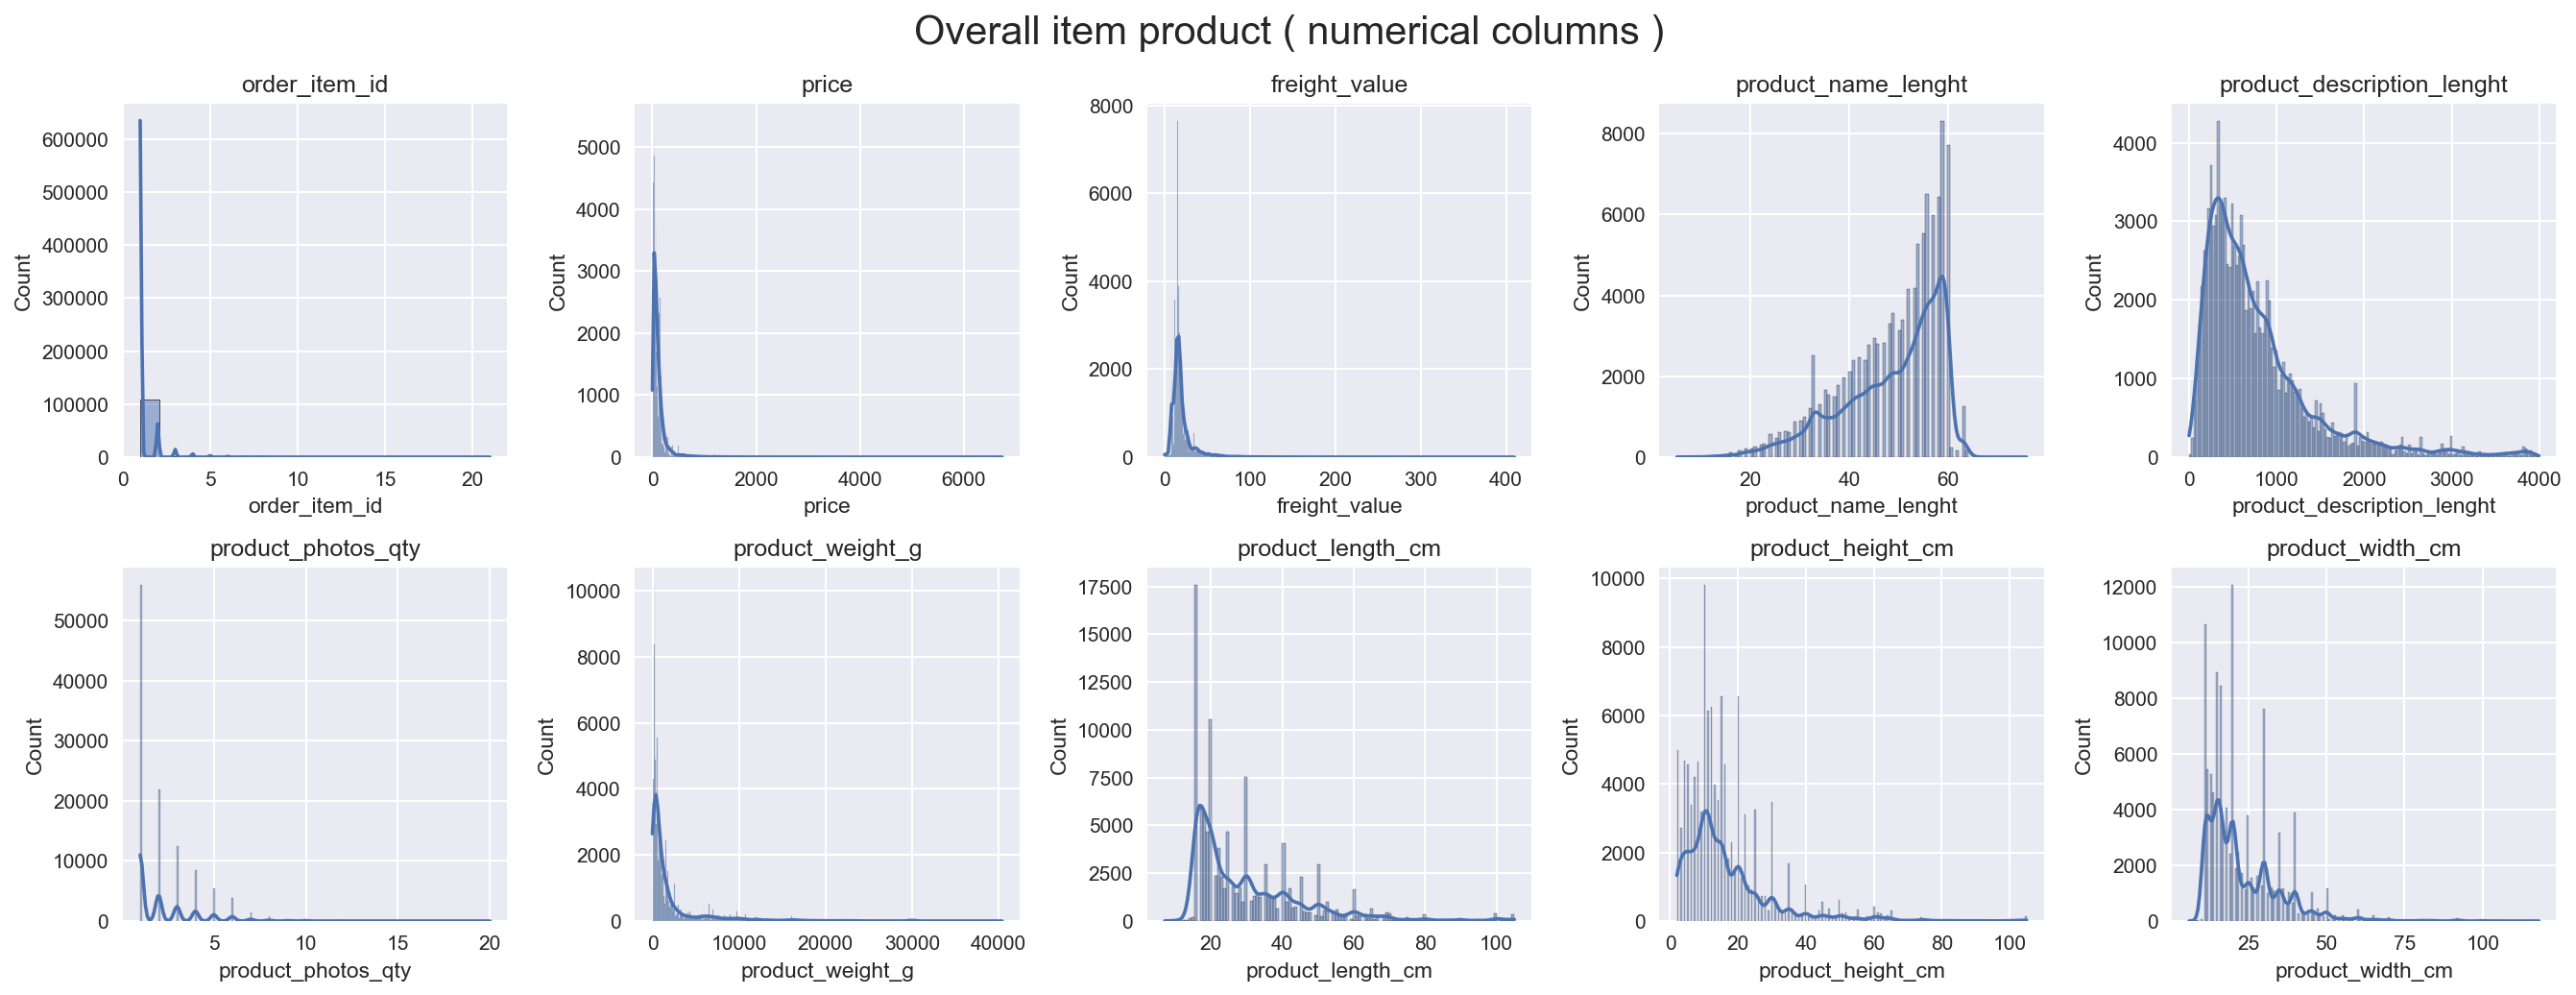

In [31]:
df_item_pd_numeric_col = [1, 5, 6, 8, 9, 10, 11, 12, 13, 14]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,7), dpi=150 )

for i,ax in enumerate(axes.flat):
    if i < 10 :
        g = sns.histplot(data=df_item_pd, x=df_item_pd.columns[df_item_pd_numeric_col[i]], kde=True, ax = ax)
        g.set_title(df_item_pd.columns[df_item_pd_numeric_col[i]])
    else :
        fig.delaxes(ax)
    
fig.suptitle("Overall item product ( numerical columns )", fontsize=20)
fig.tight_layout()
plt.show()

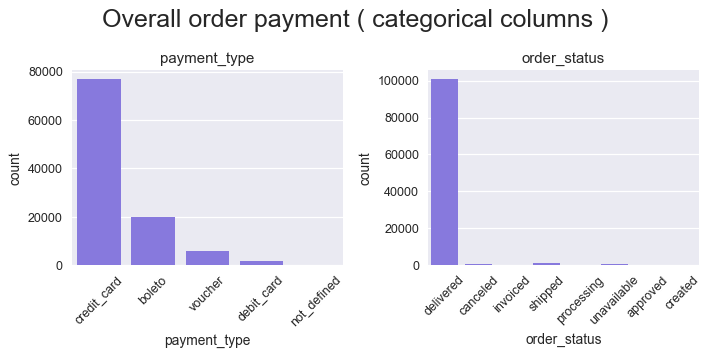

In [32]:
df_order_pm_interest = [2, 6]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4), dpi=90 )

for i,ax in enumerate(axes.flat):
    if i < 2 :
        g = sns.countplot(
            data=df_order_pm,
            x=df_order_pm.columns[df_order_pm_interest[i]],
            color='#7B68EE',
            ax=ax
        )
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        g.set_title(df_order_pm.columns[df_order_pm_interest[i]])
    else :
        fig.delaxes(ax)
    
fig.suptitle("Overall order payment ( categorical columns )", fontsize=20)
fig.tight_layout()
plt.show()